In [ ]:
from lib import t, fmap, _count, _int, _mapmap, _filter, _readlines, split, safe, dampened_safe, F

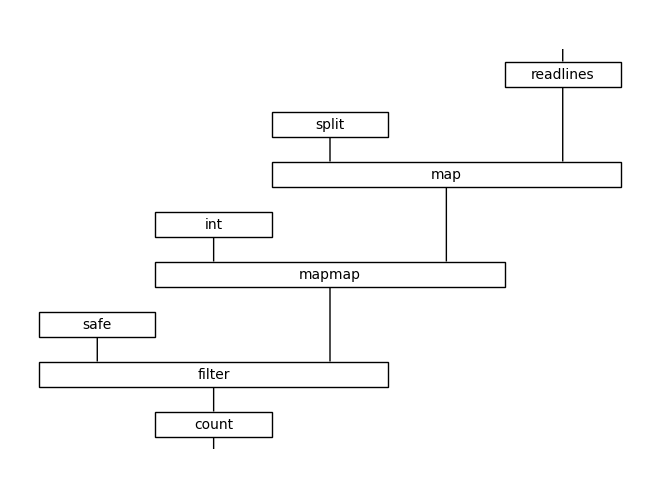

In [5]:
f1 = _readlines >> \
    fmap(split) >> \
    (_int @ t >> _mapmap) >> \
    (safe @ t >> _filter) >> \
    _count
f1.draw()
assert F(f1)("2.input") == 252

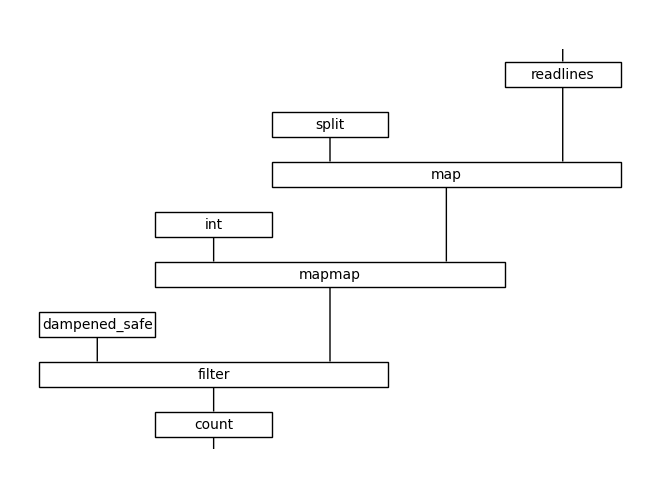

In [6]:
f2 = _readlines >> \
    fmap(split) >> \
    (_int @ t >> _mapmap) >> \
    (dampened_safe @ t >> _filter) >> \
    _count
f2.draw()
assert F(f2)("2.input") == 324